# Exercise 3 Heat Exchanger

## Problem 1
A shell-and-tube heat exchanger with one shell and two tube passes having a heat exchange area of
945 m<sup>2</sup>, connected as shown below, are designated to cool the high temperature
 circuit of a gas engine. The water temperatures and flows are given in the figure. The hot water is flowing in the tube and the cold side flows in the shell. The outer
 shell becomes hot and heat loss is estimated to 1%.
 
![Schematic](HeatExchangerExercise.png)

Please note that the arrow in the figure does not suggest actual direction of the flow. The
diagram does not suggest if the flow arrangement is parallel-flow or counter-flow. You have to find
 it out in the second question.

### Create the class for the heat exchanger analysis
In this example, we will create a class in the "thermal_system_calculation.py" called
"HeatExchangerLMTD". A template for the class is given. You will need to implement a part of the
class for this exercise. You will need implement:

- solve_temperature method
- logarithmic_mean_temperature_difference getter method
- get_heat_exchange_area method
- get_overall_heat_transfer_coefficient method

Please read the docstring of HeatExchangerLMTD, HeatExchanger, FlowHeatExchanger and FlowType
classes before you start implementing the methods.

### Create the class for the heat exchanger analysis
In this example, we will create a class in the "thermal_system_calculation.py" called
"HeatExchangerLMTD". A template for the class is given. You will need to implement a part of the
class for this exercise. You will need implement:

- `solve_temperature method`
- `logarithmic_mean_temperature_difference getter method`
- `get_heat_exchange_area method`
- `get_overall_heat_transfer_coefficient method`
- `correction_factor`
- `heat_transfer_rate_from_lmtd`

Please read the docstring of HeatExchangerLMTD, HeatExchanger, FlowHeatExchanger and FlowType
classes before you start implementing the methods.

Required formula for correction factors are found below.

- For a shell-and-tube type heat exchanger with N shells and 2N tube passes

    $R = \frac{T_i - T_o}{t_o - t_i}$

    $P = \frac{t_o - t_i}{T_i - t_i}$

    If $R \ne 1$,

    $S = \frac{\left(R^2 + 1\right)^{0.5}}{R - 1}$

    $W = \left(\frac{1 - P \cdot R}{1 - P}\right)^\frac{1}{N}$

    $F = \frac{S \ln{W}}{\ln{\frac{ 1 + W - S + S \cdot W}{1 + W - S\cdot W}}}$

    else,

    $W = \frac{N (1 - P)}{N - N \cdot P + P}$

    $F = \sqrt{2} \frac{\frac{1 - W}{W}}{\ln{\frac{\frac{W}{1 - W} + \sqrt{0.5}}{\frac{W}{1 - W} - \sqrt{0.5}}}}$

- For a cross flow, both flow mixed

    $R = \frac{T_i - T_o}{t_o - t_i}$
    
    $k_1 = 1 - \exp(-NTU)$
    
    $k_2 = 1 - \exp(-R \cdot NTU)$
    
    $P = \frac{1}{1/k_1 + R/k_2 - 1/NTU}$

    $F = \frac{1}{NTU \cdot (1 - R)} \ln{\frac{1 - R \cdot P}{1 - P}}$

- For a cross flow, one flow mixed,

    $R = \frac{T_{mix, i} - T_{mix, o}}{T_{unmixed, o} - T_{unmixed, i}}$

    $k = 1 - \exp(-NTU)$

    $P = \frac{1 - \exp{\left(-K \cdot R\right)}}{R}$

    $F = \frac{1}{NTU \cdot (1 - R)} \ln{\frac{1 - R \cdot P}{1 - P}}$

- For a cross flow, if $R = 1$, use the below formula for $F$ instead.

    $F = \frac{P}{NTU \cdot (1 - p)}$


### Calculate the outlet temperature $T_4$
Calculate the outlet temperature $T_4$. Use the class implemented above. From the temperature
found, determine if the flow arrangement is parallel flow or counter flow. Sketch the
temperature-area diagram for this case.

In [1]:
import matplotlib.pyplot as plt

from thermal_system_calculation import FlowType, FlowHeatExchanger, Fluid, HeatExchangerLMTD, \
    HeatExchangerEffectivenessNTU

# Your code here
# Assign values to your variables of known information.

# Define your flows using FlowHeatExchanger class
# Flow in the shell
flow1 = FlowHeatExchanger(
    fluid=Fluid.WATER,
    temp_in_k=90 + 273.15,
    mass_flow_kg_s=8,
    temp_out_k=58 + 273.15,
    is_in_tube=True,
)
# Flow in the tube
flow2 = FlowHeatExchanger(
    fluid=Fluid.WATER,
    temp_in_k=50 + 273.15,
    mass_flow_kg_s=24,
    is_in_tube=False, 
    heat_loss=0.01
)

# Define the heat exchanger instance using HeatExchangerLMTD class. Pass the flow instances
# defined above and other necessary information.
heat_exchanger = HeatExchangerLMTD(
    flow_type=FlowType.ShellAndTube,
    flow1=flow1,
    flow2=flow2,
    area=945,
    number_shells=1,
    number_tube_passes=2
)

heat_exchanger.solve_temperature()

print(f"Heat transfer rate is {heat_exchanger.heat_transfer_rate:.2f} W")
print(f"Outlet temperature of the flow 2 is {heat_exchanger.flow2.temp_out - 273.15:.2f} degC")

Heat transfer rate is 1076532.64 W
Outlet temperature of the flow 2 is 60.73 degC


Your answer if the flow is parallel or counter.
The heat exchanger has counter-flow arrangement because the outlet temperature of the cold side is higher thant the outlet temperature of the hot side. 

In [2]:
heat_exchanger.is_parallel_flow = False  # You have to set it True for False

Insert your temperature-area diagram here. You can either insert an image file or plot it. If
you use an image file, the file name should be "temperature_area_diagram.png" and placed in the
same folder as this notebook file.
![Temperature-Area Diagram](temperature_area_diagram.png)

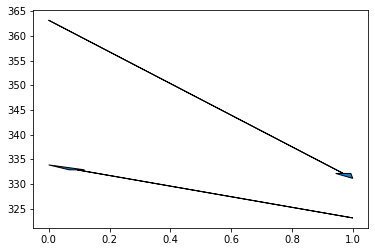

In [3]:
# If you are plotting the temperature-area diagram
fig, axe = plt.subplots()
axe.arrow(0, heat_exchanger.flow1.temp_in,
          1, heat_exchanger.flow1.temp_out - heat_exchanger.flow1.temp_in,
          head_width=0.05, head_length=1, length_includes_head=True)
axe.arrow(1, heat_exchanger.flow2.temp_in,
          -1, heat_exchanger.flow2.temp_out - heat_exchanger.flow2.temp_in,
          head_width=0.05, head_length=1, length_includes_head=True)

### Calculate the logarithmic mean temperature difference and calculate the overall heat transfer coefficient

In [4]:
print(f"The logarithmic mean temperature difference is "
      f"{heat_exchanger.logarithmic_mean_temperature_difference:.2f} K")
print(f"Correction factor is {heat_exchanger.correction_factor:.3f}")
print(f"The overall heat transfer coefficient is {heat_exchanger.get_overall_heat_transfer_coefficient():.2f} W/m2K")

The logarithmic mean temperature difference is 16.40 K
Correction factor is 0.685
The overall heat transfer coefficient is 101.39 W/m2K


### Parallel Heat Exchangers
Assume that two heat exchangers of the same type is coupled in parallel at the hot side and in
series at the cold side. See the following schematic. The mass flows for both cold and hot side
are identical for both heat exchangers. Ratio of heat loss to the environment is also identical for both heat exchangers.
![Parallel Heat Exchangers](HeatExchangerExerciseDiagrams.png)

Draw the TA-diagram for each heat exchanger without knowing all the temperature in / out at the
second heat exchanger.

Solve for each temperature at the second heat exchanger using LMTD analysis. Here, since
temperature at both outlets is not known, you have to solve them iteratively. What is the heat
transfer rate at the second heat exchanger?
(Hint: The two heat exchangers have identical area and overall heat transfer coefficient.)

Solution

#### Known
We know that the first heat exchanger will operate identically to the single heat exchanger
arrangement.

In [5]:
heat_exchanger1 = heat_exchanger
flow1_heat_exchanger2 = FlowHeatExchanger(
    fluid=Fluid.WATER,
    temp_in_k=heat_exchanger1.flow1.temp_in,  # Parallel connection
    mass_flow_kg_s=heat_exchanger1.flow1.mass_flow,
    is_in_tube=True
)
flow2_heat_exchanger2 = FlowHeatExchanger(
    fluid=Fluid.WATER,
    temp_in_k=heat_exchanger1.flow2.temp_out, # Serial connection
    mass_flow_kg_s=heat_exchanger1.flow2.mass_flow,
    is_in_tube=False,
    heat_loss = 0.01
)
heat_exchanger2 = HeatExchangerLMTD(
    flow_type=FlowType.ShellAndTube,
    flow1=flow1_heat_exchanger2,
    flow2=flow2_heat_exchanger2,
    u_h=heat_exchanger1.u_h,
    area=heat_exchanger1.area,
    is_parallel_flow=False
)

#### Find
Temperature outlet of the cold and hot side of the second heat exchanger
Heat transfer rate in the second heat exchanger

#### Assumptions
- Steady state
- Uniform and constant properties in the fluid
- Negligible change in the potential and kinetic energy in the fluid
- The overall coefficients of both heat exchangers are identical.

#### Schematic
Put your TA diagram here.


#### Analysis
Implement the `solve_temperature` method for the case that temperature at both outlets are not known. Algorithm should be as follows:

1. Assume a temperature at the hot side
2. Solve the temperature using energy balance
3. Calculate the heat transfer rate using $q = UAF\Delta T_{lm}$
4. Calculate the temperature at the hot side from the heat transfer rate from 3.
5. Repeat 2-4 until your change in $q$ does is negligible, say 0.1%.

In [6]:
heat_exchanger2.solve_temperature()
print(f"Heat transfer rate at the heat exchanger 2 is {heat_exchanger2.heat_transfer_rate:.2f}")
print(f"Outlet temperature of the hot water is {heat_exchanger2.flow_hot_side.temp_out:.2f}")
print(f"Outlet temperature of the cold water is {heat_exchanger2.flow_cold_side.temp_out:.2f}")

2021-05-24 12:20:52,963 - thermal_system_calculation - INFO - Temperature: T1 = 363.15, T2 = 341.20, t1 = 333.88, t2 = 341.23
2021-05-24 12:20:52,963 - thermal_system_calculation - INFO - LMTD: 13.31
2021-05-24 12:20:52,964 - thermal_system_calculation - INFO - q_energy: 738580.22
2021-05-24 12:20:52,964 - thermal_system_calculation - INFO - q_lmtd: 1030407.13
2021-05-24 12:20:52,964 - thermal_system_calculation - INFO - Temperature: T1 = 363.15, T2 = 340.33, t1 = 333.88, t2 = 341.52
2021-05-24 12:20:52,965 - thermal_system_calculation - INFO - LMTD: 12.55
2021-05-24 12:20:52,965 - thermal_system_calculation - INFO - q_energy: 767762.91
2021-05-24 12:20:52,966 - thermal_system_calculation - INFO - q_lmtd: 899117.47
2021-05-24 12:20:52,966 - thermal_system_calculation - INFO - Temperature: T1 = 363.15, T2 = 339.94, t1 = 333.88, t2 = 341.65
2021-05-24 12:20:52,966 - thermal_system_calculation - INFO - LMTD: 12.19
2021-05-24 12:20:52,967 - thermal_system_calculation - INFO - q_energy: 780

Heat transfer rate at the heat exchanger 2 is 787928.29
Outlet temperature of the hot water is 339.73
Outlet temperature of the cold water is 341.72


## Problem 2
Now solve the last part of the problem using effectiveness-NTU method.

You need to implement the class `HeatExchangerEffectivenessNTU` to solve it.
You will have to implement the methods
 - `heat_capacity_rate_min`
 - `heat_capacity_rate_max`
 - `heat_capacity_rate_ratio`
 - `heat_transfer_rate_max`
 - `ntu`
 - `get_effectiveness_from_ntu`
 - `solve_temperature`

![Formula for effectiveness](formula_effectiveness.png)

In [7]:
flow_hot_side = FlowHeatExchanger(
    fluid=Fluid.WATER,
    temp_in_k=90 + 273.15,
    mass_flow_kg_s=9,
    is_in_tube=True
)
flow_cold_side = FlowHeatExchanger(
    fluid=Fluid.WATER,
    temp_in_k=heat_exchanger1.flow_cold_side.temp_out,
    mass_flow_kg_s=heat_exchanger1.flow_cold_side.mass_flow,
    is_in_tube=False,
    heat_loss=0.01
)

heat_exchanger_e_ntu = HeatExchangerEffectivenessNTU(
    flow_type=FlowType.ShellAndTube,
    flow1=flow_hot_side,
    flow2=flow_cold_side,
    number_shell_passes=1,
    u_h=heat_exchanger1.u_h,
    area=heat_exchanger1.area
)
heat_exchanger_e_ntu.solve_temperature()

effectiveness = heat_exchanger_e_ntu.get_effectiveness_from_ntu()
heat_transfer_rate = effectiveness * heat_exchanger_e_ntu.heat_transfer_rate_max

print(f"Heat capacity rate max: {heat_exchanger_e_ntu.heat_capacity_rate_max}")
print(heat_exchanger_e_ntu.u_h * heat_exchanger_e_ntu.area)
print(f"Heat capacity rate min: {heat_exchanger_e_ntu.heat_capacity_rate_min}")
print(f"Heat capacity rate ratio: {heat_exchanger_e_ntu.heat_capacity_rate_ratio}")
print(f"NTU: {heat_exchanger_e_ntu.ntu:.2f}")
print(f"Effectiveness: {effectiveness:.2f}")
print(f"Heat transfer rate: {heat_transfer_rate:.2f}")
print(f"Outlet temperature of the hot water is {heat_exchanger_e_ntu.flow_hot_side.temp_out:.2f}")
print(f"Outlet temperature of the cold water is {heat_exchanger_e_ntu.flow_cold_side.temp_out:.2f}")

Heat capacity rate max: 100446.59681181119
95815.92966313308
Heat capacity rate min: 37846.850455010295
Heat capacity rate ratio: 0.3767857912191606
NTU: 2.53
Effectiveness: 0.77
Heat transfer rate: 852697.74
Outlet temperature of the hot water is 340.62
Outlet temperature of the cold water is 342.37
